# Part I: Exploratory Data Analysis

---

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nba_data_2016_2022 = pd.read_csv('../data/nba_games.csv')
nba_data_2016_2022 = nba_data_2016_2022.sort_values('date', ascending = False)

In [3]:
nba_data_2016_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17772 entries, 7476 to 16905
Columns: 151 entries, Unnamed: 0 to won
dtypes: bool(1), float64(140), int64(7), object(3)
memory usage: 20.5+ MB


In [5]:
nba_data_2016_2022.describe()

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,...,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
count,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,...,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000
mean,8885.500000,241.564258,241.564258,39.954817,87.020538,0.460049,11.022901,30.800923,0.356935,17.415710,...,42.718473,5.937964,9.013302,40.079811,34.864979,178.187430,118.660758,108.348244,0.500000,2018.952284
std,5130.478828,7.002952,7.002952,5.225686,7.233960,0.054656,3.961903,7.905325,0.089744,5.969888,...,14.801285,4.493377,6.725743,21.216193,8.505948,40.809205,11.087727,12.786684,0.500014,2.015800
min,0.000000,240.000000,240.000000,19.000000,60.000000,0.269000,0.000000,4.000000,0.000000,1.000000,...,12.800000,0.000000,0.000000,4.600000,22.100000,89.000000,77.000000,64.000000,0.000000,2016.000000
25%,4442.750000,240.000000,240.000000,36.000000,82.000000,0.422000,8.000000,25.000000,0.297000,13.000000,...,32.700000,3.800000,5.200000,25.500000,30.000000,148.000000,111.000000,100.000000,0.000000,2017.000000
50%,8885.500000,240.000000,240.000000,40.000000,87.000000,0.459000,11.000000,31.000000,0.355000,17.000000,...,40.000000,5.000000,7.500000,33.300000,33.000000,167.000000,119.000000,108.000000,0.500000,2019.000000
75%,13328.250000,240.000000,240.000000,43.000000,92.000000,0.495000,14.000000,36.000000,0.417000,21.000000,...,48.900000,6.700000,10.800000,50.000000,37.200000,202.000000,126.000000,117.000000,1.000000,2021.000000
max,17771.000000,340.000000,340.000000,63.000000,128.000000,0.687000,29.000000,70.000000,0.842000,44.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,162.000000,168.000000,1.000000,2022.000000


In [8]:
# NBA Box Score data from 2016 to 2022
nba_data_2016_2022['season'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016])

In [11]:
# Anomalies
# Look for games where a team scored more than 155 points 

nba_data_2016_2022[(nba_data_2016_2022['total'] > 155)]

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
16586,16586,290.0,290.0,57.0,105.0,0.543,9.0,29.0,0.310,34.0,...,29.8,29.7,227.0,139.0,WAS,153,1,2022,2022-02-25,True
9942,9942,240.0,240.0,54.0,93.0,0.581,24.0,45.0,0.533,26.0,...,25.6,32.4,225.0,154.0,IND,126,1,2022,2022-01-26,True
3279,3279,240.0,240.0,52.0,89.0,0.584,25.0,51.0,0.490,29.0,...,29.1,33.5,160.0,160.0,ATL,111,0,2020,2019-11-30,True
17184,17184,240.0,240.0,55.0,103.0,0.534,23.0,54.0,0.426,26.0,...,33.3,35.2,203.0,151.0,WAS,158,1,2020,2019-10-30,True
17185,17185,240.0,240.0,57.0,91.0,0.626,20.0,36.0,0.556,24.0,...,40.0,43.1,300.0,151.0,HOU,159,0,2020,2019-10-30,False
17756,17756,340.0,340.0,56.0,119.0,0.471,21.0,48.0,0.438,35.0,...,100.0,37.0,160.0,125.0,ATL,161,1,2019,2019-03-01,True
17757,17757,340.0,340.0,61.0,123.0,0.496,22.0,60.0,0.367,17.0,...,53.2,37.5,154.0,117.0,CHI,168,0,2019,2019-03-01,False


In [22]:
nba_data_2016_2022.iloc[:,30:45]

,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max
7476,14.1,13.5,13.6,100.0,111.8,97.7,NaN,NaN,12.0,21.0,0.667,6.0,11.0,0.667,4.0
7477,8.7,17.4,20.5,100.0,97.7,111.8,NaN,NaN,12.0,23.0,0.750,5.0,11.0,0.800,5.0
11533,9.4,4.7,6.0,100.0,108.4,97.9,NaN,NaN,12.0,23.0,0.750,5.0,11.0,0.500,3.0
11532,2.1,4.2,16.9,100.0,97.9,108.4,NaN,NaN,10.0,20.0,1.000,5.0,9.0,1.000,8.0
973,8.4,12.5,13.8,100.0,102.1,112.6,NaN,NaN,9.0,23.0,1.000,4.0,9.0,0.600,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,9.4,6.0,14.5,100.0,98.6,111.2,NaN,NaN,8.0,16.0,1.000,2.0,6.0,1.000,3.0
16086,9.0,4.5,15.9,100.0,94.9,110.9,NaN,NaN,7.0,20.0,1.000,2.0,7.0,0.667,10.0
16087,8.0,10.8,15.9,100.0,110.9,94.9,NaN,NaN,14.0,26.0,1.000,5.0,12.0,1.000,7.0
16904,5.0,10.3,9.0,100.0,95.5,97.5,NaN,NaN,12.0,22.0,0.571,3.0,7.0,0.500,3.0


In [20]:
# Pts and total/pts_opp and team_opp are the same values, just different types
# Data preprocessing: keep pts and pts_opp; drop total and total_opp, which are the int representation of pts/pts_opp

nba_data_2016_2022[['team','pts','total','team_opp','pts_opp','total_opp']]

,team,pts,total,team_opp,pts_opp,total_opp
7476,GSW,103.0,103,BOS,90.0,90
7477,BOS,90.0,90,GSW,103.0,103
11533,GSW,104.0,104,BOS,94.0,94
11532,BOS,94.0,94,GSW,104.0,104
973,BOS,97.0,97,GSW,107.0,107
...,...,...,...,...,...,...
1225,ATL,94.0,94,DET,106.0,106
16086,NOP,95.0,95,GSW,111.0,111
16087,GSW,111.0,111,NOP,95.0,95
16904,CLE,95.0,95,CHI,97.0,97


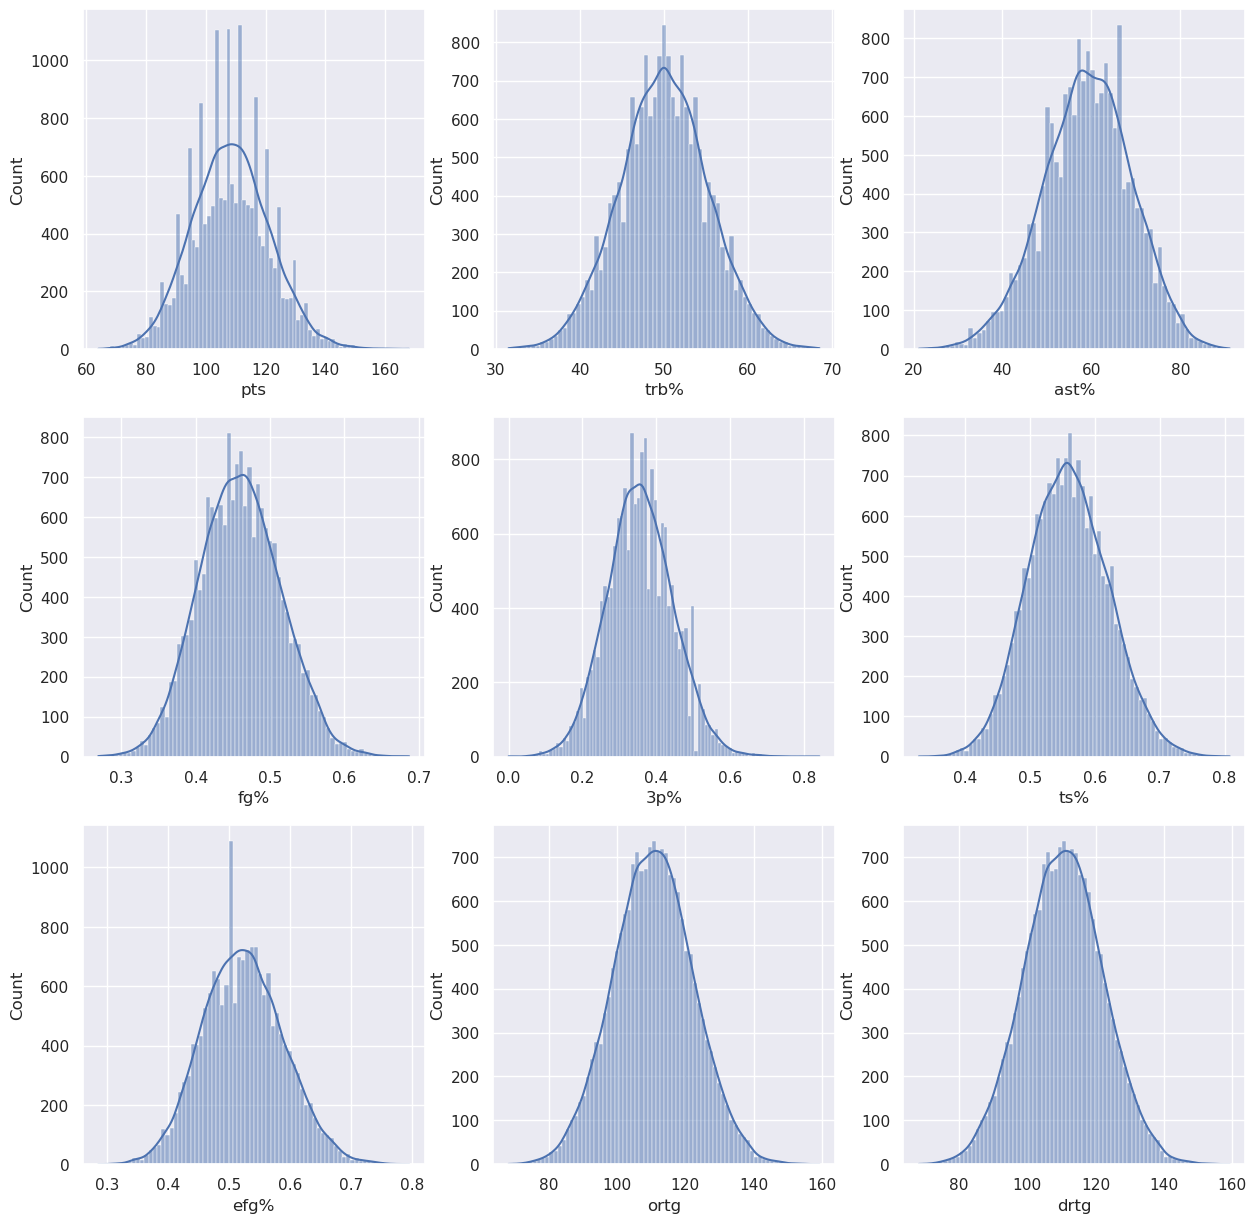

In [38]:
statistics = ['pts', 'trb%', 'ast%',
              'fg%', '3p%', 'ts%', 
              'efg%','ortg','drtg']

sns.set(rc={'figure.figsize':(15,15)})

for i, stat in enumerate(statistics, 1):
    plt.subplot(3,3,i)
    plot = sns.histplot(x=stat, data=nba_data_2016_2022, stat='count', kde=True)